In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from IPython.display import display

# 1. Data Ingestion & Quality Profiling

In [3]:
#1.1 Load & Inspect 
#Read car_prices.csv into a pandas DataFrame
df = pd.read_csv(r'C:\Users\ANJALI GUPTA\OneDrive\Dataset-Pyhton-001\Dataset\car_prices.csv')

# Display the first 5 rows.
display(df.head())

# Display data types and record count.

display(df.info())

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493481 non-null  object 
 6   vin           558837 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547043 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         533402 non-null  object 
 11  interior      541012 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558825 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558799 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


None

In [4]:
#1.2.  Understanding the Data Structure
#Check the shape of the dataset (rows and columns).
print("Shape of the dataset",df.shape)

#Display column names and data types. 


print("\nColumns Names:","Data Type")
print(df.dtypes)



Shape of the dataset (558837, 16)

Columns Names: Data Type
year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object


In [5]:
#1.3 Missing & Anomaly Detection 
#Quantify nulls per column; visualize with a bar chart or heatmap.
null_counts = df.isnull().sum()
print("\nColumns Names:","Null Count")
null_counts


Columns Names: Null Count


year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65356
vin                 0
state              26
condition       11794
odometer           94
color           25435
interior        17825
seller             26
mmr                12
sellingprice       12
saledate           38
dtype: int64

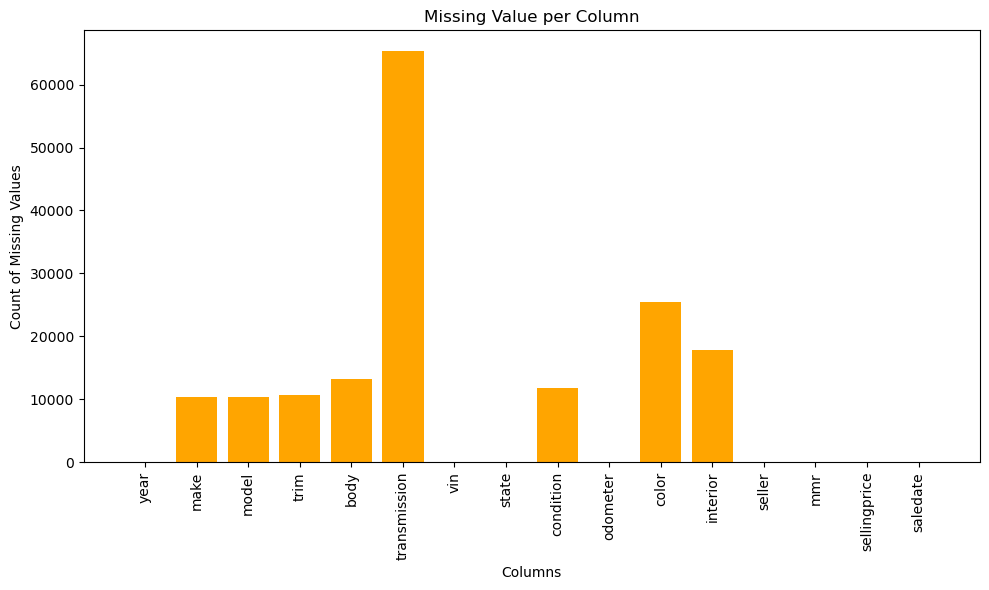

In [6]:
#Plot missing value
plt.figure(figsize=(10, 6))
plt.bar(null_counts.index, null_counts.values, color = "Orange")
 
#Style the plot
plt.xticks(rotation=90)
plt.title("Missing Value per Column")
plt.ylabel("Count of Missing Values")
plt.xlabel("Columns")
plt.tight_layout()
plt.show()

In [7]:
#Percentage of null values

null_percent = (null_counts / len(df)) * 100
print("\nColumns Names:","Percentage")
print(null_percent)


Columns Names: Percentage
year             0.000000
make             1.843292
model            1.860829
trim             1.905922
body             2.361154
transmission    11.695002
vin              0.000000
state            0.004653
condition        2.110454
odometer         0.016821
color            4.551417
interior         3.189660
seller           0.004653
mmr              0.002147
sellingprice     0.002147
saledate         0.006800
dtype: float64


In [8]:
#Resolve null values according to their datatype 
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna("Unknown")  # Fill text fields with "Unknown"
    else:
        df[col] = df[col].fillna(0)          # Fill numeric fields with 0

#Checking the dataset after resolving null values      
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          558837 non-null  object 
 2   model         558837 non-null  object 
 3   trim          558837 non-null  object 
 4   body          558837 non-null  object 
 5   transmission  558837 non-null  object 
 6   vin           558837 non-null  object 
 7   state         558837 non-null  object 
 8   condition     558837 non-null  float64
 9   odometer      558837 non-null  float64
 10  color         558837 non-null  object 
 11  interior      558837 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  float64
 14  sellingprice  558837 non-null  float64
 15  saledate      558837 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [9]:
#Count and display the number of duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows found: {duplicate_count}")
 
#Remove duplicate rows
df = df.drop_duplicates()
 
#Confirm the new shape of the DataFrame
print(f"Dataset shape after removing duplicates: {df.shape}")

Number of duplicate rows found: 0
Dataset shape after removing duplicates: (558837, 16)


# 2. Data frames Queries

In [10]:
# 2.1 Average, Min, Max Price
print("Average Price:", df['sellingprice'].mean())
print("Min Price:", df['sellingprice'].min())
print("Max Price:", df['sellingprice'].max())

Average Price: 13611.009090307192
Min Price: 0.0
Max Price: 230000.0


In [11]:
# 2.2 Unique Colors
unique_colors = df['color'].unique()
print(unique_colors)

['white' 'gray' 'black' 'red' 'silver' 'blue' 'brown' 'beige' 'purple'
 'burgundy' 'Unknown' 'gold' 'yellow' 'green' 'charcoal' 'orange'
 'off-white' 'turquoise' 'pink' 'lime']


In [12]:
# 2.3 Number of Unique Makes and Models
print("Unique Makes:", df['make'].nunique())
print("Unique Models:", df['model'].nunique())

Unique Makes: 97
Unique Models: 974


In [29]:
# 2.4 Cars priced > $165,000
df_high_price = df[df['sellingprice'] > 165000]
print("Count of cars with price greater than $165000:", len(df_high_price))

Count of cars with price greater than $165000: 7


In [14]:
# 2.5 Top 5 most sold models
print("Top 5 Sold Models:\n", df['model'].value_counts().head(5).reset_index().to_string(index = False, header = True))

Top 5 Sold Models:
  model  count
Altima  19349
 F-150  14479
Fusion  12946
 Camry  12545
Escape  11861


In [15]:
# 2.6 Average Price by Make
print("Avg Price by Make:")
      
print(df.groupby('make')['sellingprice'].mean().sort_values(ascending=False).head(5).reset_index().to_string(index = False, header = True))

Avg Price by Make:
       make  sellingprice
Rolls-Royce 153488.235294
    Ferrari 127210.526316
Lamborghini 112625.000000
    Bentley  74367.672414
  airstream  71000.000000


In [16]:
# 2.7 Min Selling Price per Interior
print("Min Price by Interior:\n", df.groupby('interior')['sellingprice'].min().sort_values().reset_index().to_string(index = False, header = True))

Min Price by Interior:
  interior  sellingprice
  Unknown           0.0
    black           0.0
     gray           0.0
      tan         100.0
    green         100.0
    beige         100.0
     blue         150.0
   silver         150.0
 burgundy         175.0
   purple         200.0
      red         200.0
    brown         200.0
     gold         250.0
    white         350.0
off-white         900.0
   orange        1200.0
   yellow        3100.0


In [17]:
# 2.8 Highest Odometer by Year
print("Highest Odometer by Year:")
print(df.groupby('year')['odometer'].max().sort_values(ascending=False).head(5).reset_index().to_string(index = False, header = True))

Highest Odometer by Year:
 year  odometer
 1999  999999.0
 2013  999999.0
 2011  999999.0
 2010  999999.0
 2009  999999.0


In [18]:
# 2.9 Add 'car_age'
df['car_age'] = 2025 - df['year']
print("Car Age")
display(df[['year', 'car_age']].head())

Car Age


,year,car_age
0,2015,10
1,2015,10
2,2014,11
3,2015,10
4,2014,11


In [19]:
# 2.10 Cars with condition >= 48 and odometer > 90000
condition_odo = df[(df['condition'] >= 48) & (df['odometer'] > 90000)]
print("Count of such cars:", len(condition_odo))

Count of such cars: 746


In [20]:
# 2.11 State with highest avg price for cars newer than 2013
newer_cars = df[df['year'] > 2013]
print("State with highest avg price:\n")
print(newer_cars.groupby('state')['sellingprice'].mean().sort_values(ascending=False).head(3).reset_index().to_string(index = False, header = True))

State with highest avg price:

state  sellingprice
   oh  28020.221053
   ab  25204.255319
   nj  24237.063973


In [21]:
# 2.12 Value for money: Top 20% by condition, makes with lowest average price
top_condition_threshold = df['condition'].quantile(0.80)
top_condition_cars = df[df['condition'] >= top_condition_threshold]
print("Value for Money Makes:\n", top_condition_cars.groupby('make')['sellingprice'].mean().sort_values().head(5).reset_index().to_string(index = False, header = True))

Value for Money Makes:
       make  sellingprice
     Isuzu   1125.000000
Oldsmobile   1910.000000
     honda   4233.333333
    Saturn   5700.406504
    subaru   6200.000000


# 3. Data Visualization and insights:

### 3.1 Correlation Heatmap

This heatmap shows how numerical features such as `sellingprice`, `odometer`, and `condition` are correlated with each other. Values closer to 1 or -1 show strong positive or negative relationships.




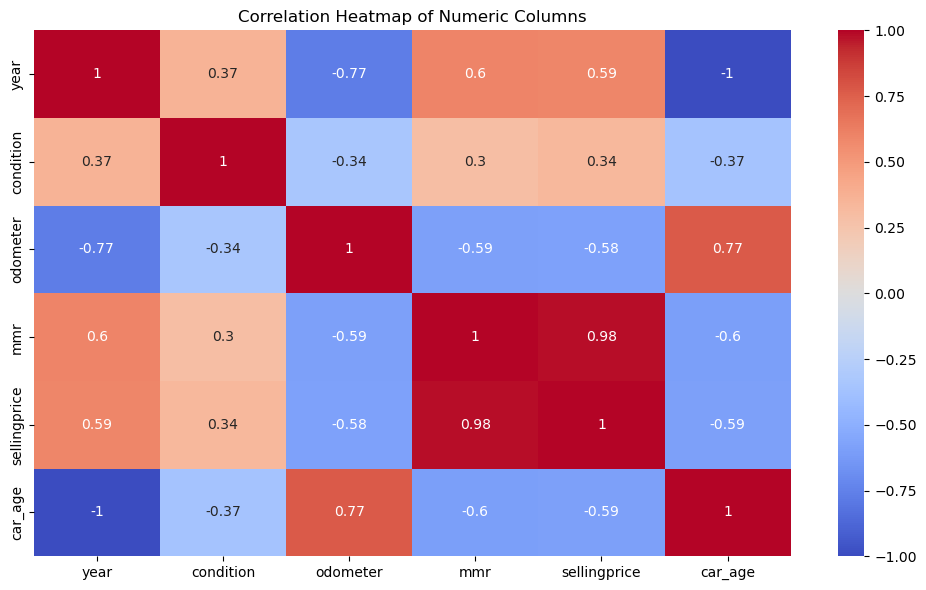

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Columns")
plt.tight_layout()
plt.show()

### 3.2 Average Selling Price by Year

This bar plot shows how the average selling price of cars has changed over the years. It helps identify pricing trends.

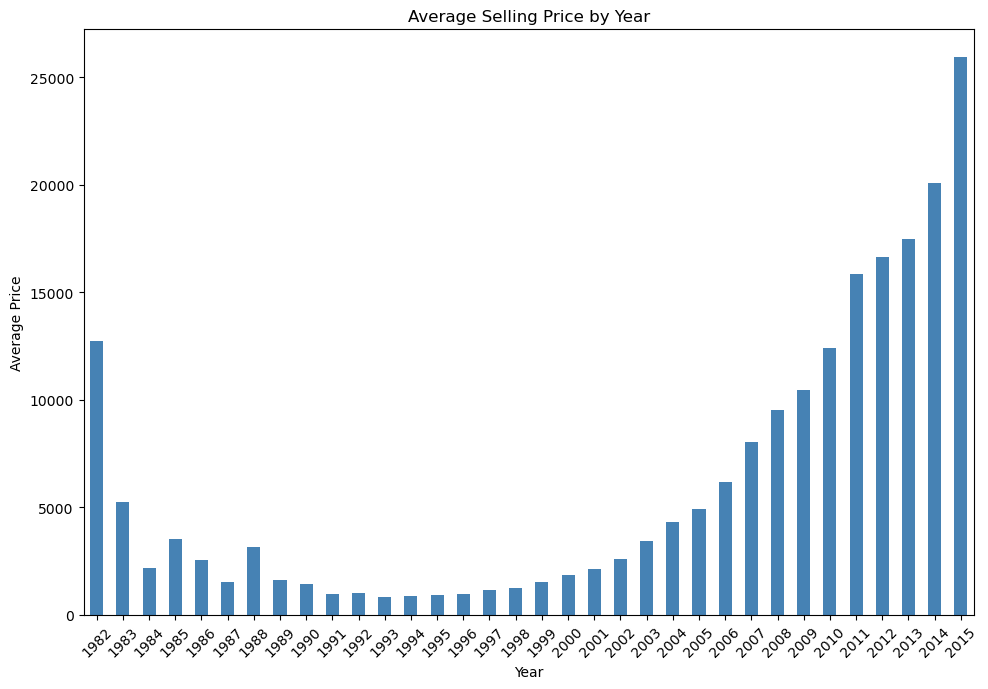

In [23]:
avg_price_by_year = df.groupby('year')['sellingprice'].mean()
plt.figure(figsize=(10, 7))
avg_price_by_year.plot(kind='bar', color='steelblue')
plt.title("Average Selling Price by Year")
plt.ylabel("Average Price")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3.3 Average Selling Price by Odometer

This line plot groups cars into odometer ranges and shows their average selling price. It helps explore the relationship between mileage and value.

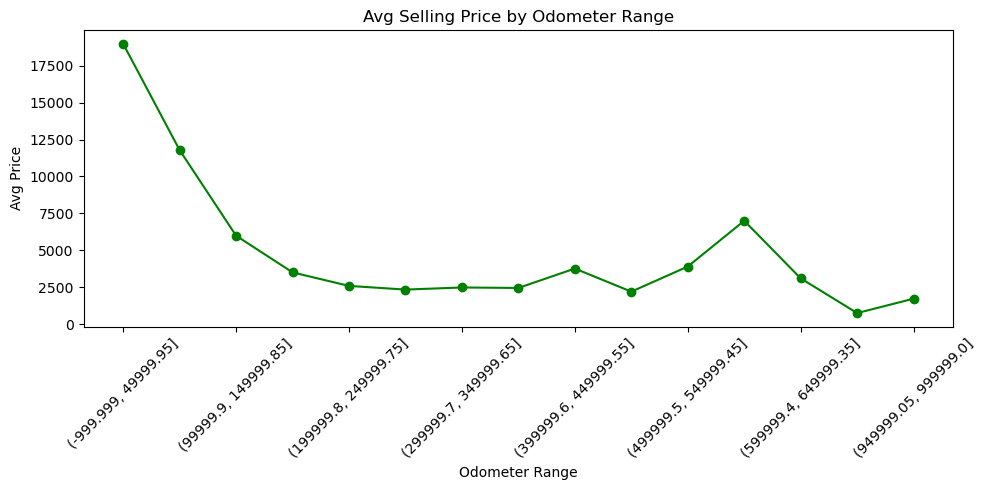

In [24]:
df['odometer_bin'] = pd.cut(df['odometer'], bins=20)
avg_price_by_odo = df.groupby('odometer_bin', observed=True)['sellingprice'].mean()
plt.figure(figsize=(10, 5))
avg_price_by_odo.plot(marker='o', color='green')
plt.title("Avg Selling Price by Odometer Range")
plt.ylabel("Avg Price")
plt.xlabel("Odometer Range")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3.4 Number of Cars Sold by State

This bar chart shows how many cars were sold in each state. You can easily identify the top 3 states with the highest sales volume.

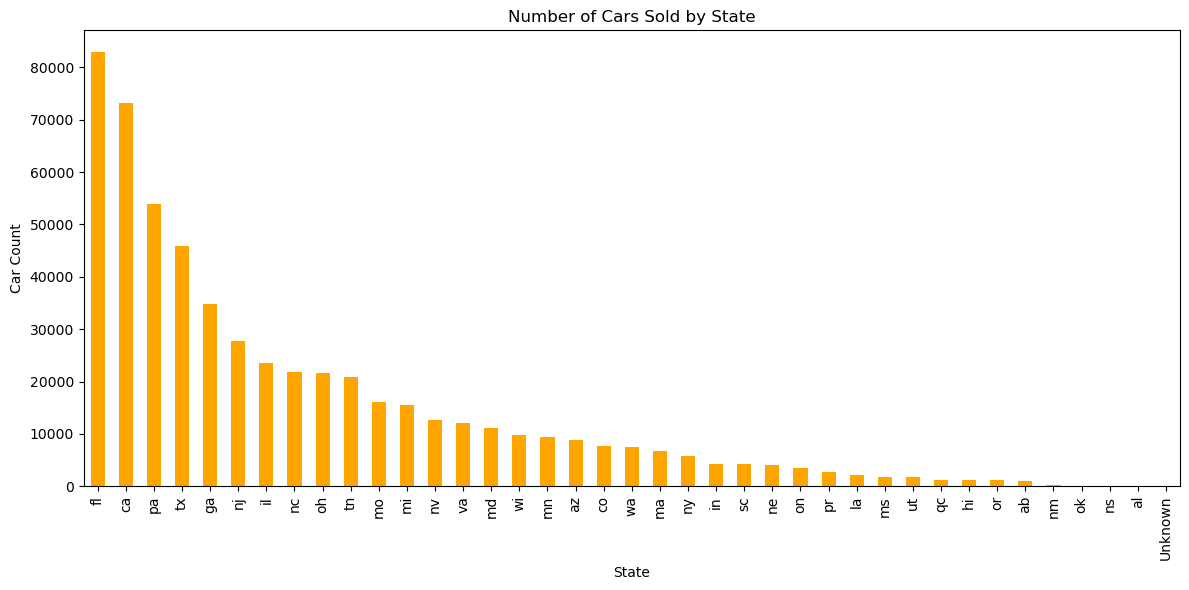

In [25]:
cars_by_state = df['state'].value_counts()
plt.figure(figsize=(12, 6))
cars_by_state.plot(kind='bar', color='orange')
plt.title("Number of Cars Sold by State")
plt.ylabel("Car Count")
plt.xlabel("State")
plt.tight_layout()
plt.show()

### 3.5 Avg Selling Price by Condition (Score Range of 5)

Cars are grouped by condition score ranges of size 5. This bar chart shows how average price changes across these groups.

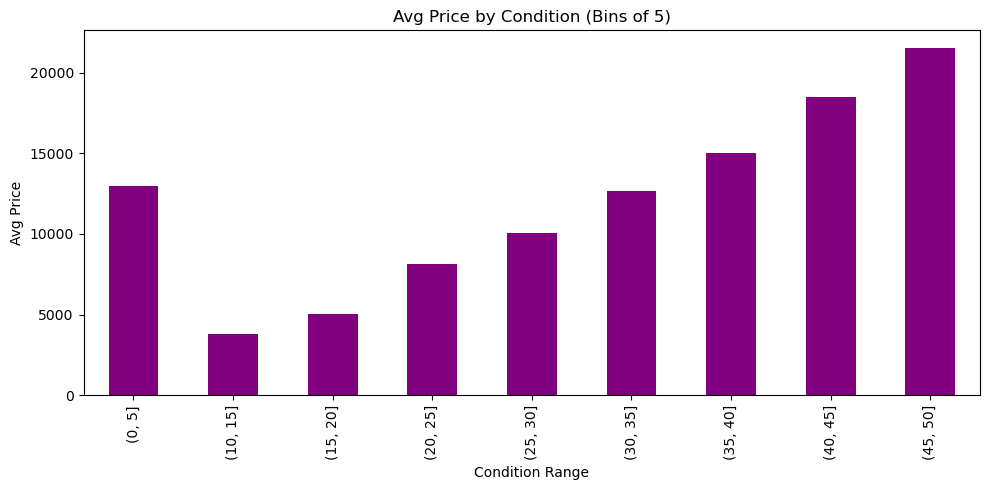

In [26]:
df['condition_bin5'] = pd.cut(df['condition'], bins=range(0, 105, 5))
avg_price_by_cond_bin5 = df.groupby('condition_bin5', observed=True)['sellingprice'].mean()
plt.figure(figsize=(10, 5))
avg_price_by_cond_bin5.plot(kind='bar', color='purple')
plt.title("Avg Price by Condition (Bins of 5)")
plt.ylabel("Avg Price")
plt.xlabel("Condition Range")
plt.tight_layout()
plt.show()

### 3.6 Number of Cars Sold by Condition (Score Range of 10)

This bar plot displays the count of cars sold in different condition score ranges. It helps assess the most common quality tiers.

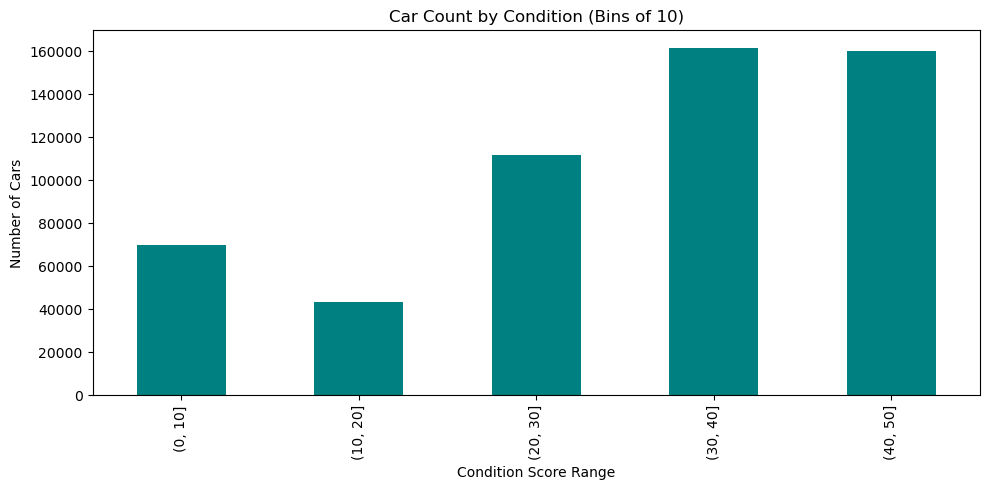

In [27]:
df['condition_bin10'] = pd.cut(df['condition'], bins=range(0, 60, 10))
cars_count_by_cond10 = df['condition_bin10'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
cars_count_by_cond10.plot(kind='bar', color='teal')
plt.title("Car Count by Condition (Bins of 10)")
plt.ylabel("Number of Cars")
plt.xlabel("Condition Score Range")
plt.tight_layout()
plt.show()

### 3.7 Box Plot: Selling Price by Color

Box plots help compare the price distribution by car color. Outliers show unusually high/low prices. We show both with and without outliers.

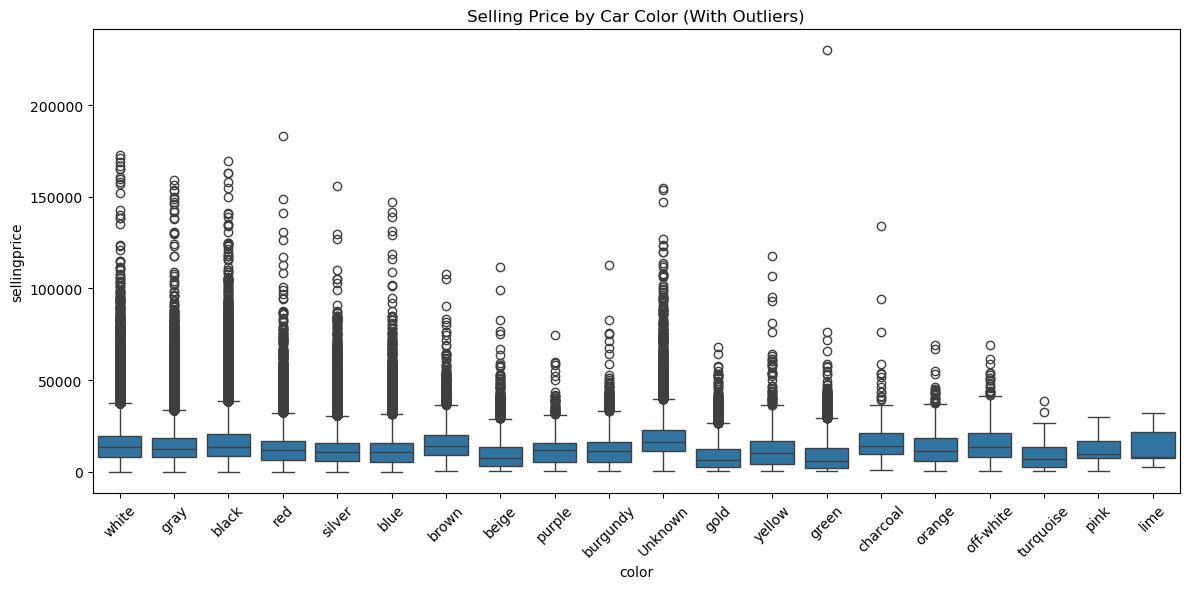

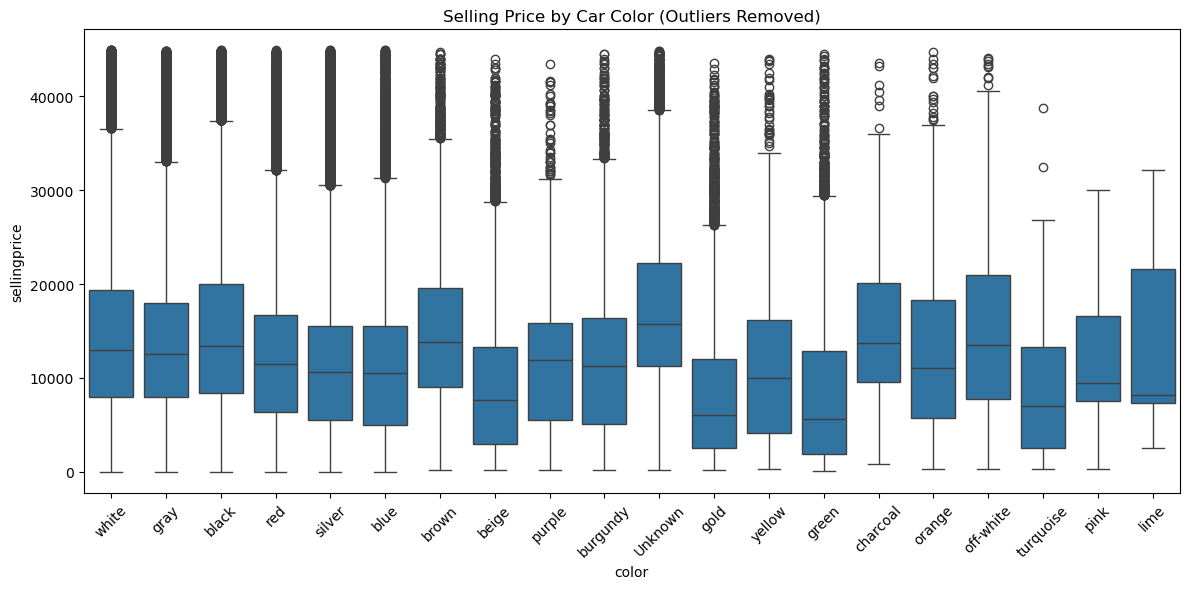

In [28]:
# With outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='color', y='sellingprice')
plt.title("Selling Price by Car Color (With Outliers)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Remove top 1% outliers
cap = df['sellingprice'].quantile(0.99)
filtered_df = df[df['sellingprice'] <= cap]

# Without outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='color', y='sellingprice')
plt.title("Selling Price by Car Color (Outliers Removed)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()